# Decision Tree Playgolf

#### Laden der Bibliotheken

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Laden des Playgolf-Datensatzes

In [14]:
!wget -O play_golf.csv https://raw.githubusercontent.com/dsbademo/DSBA/main/play_golf.csv
playgolf = pd.read_csv("play_golf.csv")
playgolf.head()

--2022-10-18 10:58:57--  https://raw.githubusercontent.com/dsbademo/DSBA/main/play_golf.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428 [text/plain]
Saving to: 'play_golf.csv'

play_golf.csv       100%[===================>]     428  --.-KB/s    in 0s      

2022-10-18 10:59:00 (18.6 MB/s) - 'play_golf.csv' saved [428/428]



,Outlook,Temperature,Humidity,Windy,Play
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


#### Beschreibung des Datensatzes

In [15]:
print(playgolf.columns)
print(playgolf.shape)
print(playgolf.head(3))

Index(['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play'], dtype='object')
(14, 5)
    Outlook Temperature Humidity  Windy Play
0     Rainy         Hot     High  False   No
1     Rainy         Hot     High   True   No
2  Overcast         Hot     High  False  Yes


#### One Hot Encoding(Dummy Encoding) der kategorialen Variablen

In [16]:
playgolf = pd.get_dummies(playgolf, columns=["Outlook","Temperature","Humidity","Windy"])

In [17]:
print(playgolf.columns)
print(playgolf.shape)
print(playgolf.head(3))

Index(['Play', 'Outlook_Overcast', 'Outlook_Rainy', 'Outlook_Sunny',
       'Temperature_Cool', 'Temperature_Hot', 'Temperature_Mild',
       'Humidity_High', 'Humidity_Normal', 'Windy_False', 'Windy_True'],
      dtype='object')
(14, 11)
  Play  Outlook_Overcast  Outlook_Rainy  Outlook_Sunny  Temperature_Cool  \
0   No                 0              1              0                 0   
1   No                 0              1              0                 0   
2  Yes                 1              0              0                 0   

   Temperature_Hot  Temperature_Mild  Humidity_High  Humidity_Normal  \
0                1                 0              1                0   
1                1                 0              1                0   
2                1                 0              1                0   

   Windy_False  Windy_True  
0            1           0  
1            0           1  
2            1           0  


#### Selektion der Variablen

In [18]:
X = playgolf.values[:,1:11] # Features
y = playgolf.values[:,0] # Target variable

#### Split dataset into training set and test set

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Create Decision Tree classifer object

In [20]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)

#### Train Decision Tree Classifer

In [21]:
tree = tree.fit(X_train,y_train)

#### Vorhersage

In [22]:
y_pred = tree.predict(X_test)
y_pred

array(['No', 'No', 'Yes'], dtype=object)

#### Modell Güte

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


#### Baumstruktur

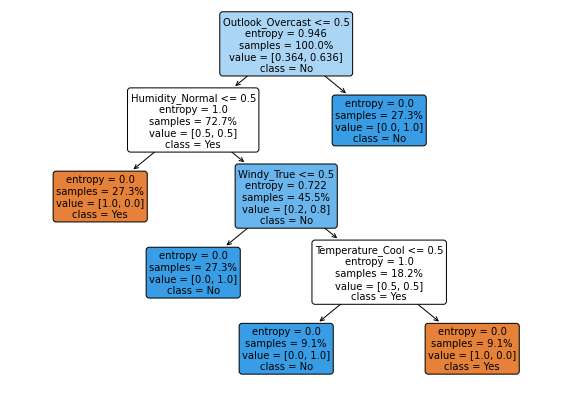

In [24]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plt_tree = plot_tree(tree, filled=True, feature_names = playgolf.columns[1:], class_names=['Yes','No'], impurity=True, proportion=True, rounded=True, fontsize=10)